In [1]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARIMA
from scipy import signal
import scipy.stats as ss
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Turb2

In [2]:
Turb2 = pd.read_csv('./FRMHN11.csv',sep=';',decimal=',',parse_dates=['DateTime'],dayfirst=True)
Turb2.head(3)


,DateTime,ActivePower,ProductionForecast_D,ProductionForecast_M
0,2020-03-05 00:00:00,1697.202216,1750.206339,1338.75
1,2020-03-05 01:00:00,1708.172571,1859.345119,1143.75
2,2020-03-05 02:00:00,1244.708609,1727.167637,1046.25


In [3]:
Turb2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11762 entries, 0 to 11761
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DateTime              11762 non-null  datetime64[ns]
 1   ActivePower           11762 non-null  float64       
 2   ProductionForecast_D  11762 non-null  float64       
 3   ProductionForecast_M  11762 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 367.7 KB


In [4]:
print('There are %d zero values for the variable "ActivePower".' % (Turb2.ActivePower == 0).sum())

There are 7 zero values for the variable "ActivePower".


In [5]:
print('There are %d zero values for the variable "ProductionForecast_D" .' % (Turb2.ProductionForecast_D == 0).sum())


There are 940 zero values for the variable "ProductionForecast_D" .


In [6]:
print('There are %d zero values for the variable "ProductionForecast_M".' % (Turb2.ActivePower == 0).sum())

There are 7 zero values for the variable "ProductionForecast_M".


In [7]:
# Répartition des valeurs nulles pour ProductionForecast_D
np.array(Turb2.loc[Turb2.ProductionForecast_D <= 0].index)[1:] - np.array(Turb2.loc[Turb2.ProductionForecast_D <= 0].index)[0:-1]

 

array([  1,  43,   1,   1,  16,   1,   2,   1,   2,   1,   1,   8,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   5,   1,
       182,   1, 105,   1,   1,   1,   1,   8,   1,   1,   1,   1,  37,
        87,   7,   1,   1,   1,   1,  16,   1,  13,   1,   1,   5,   2,
         1,   2,   1,   8,   1,  72,   5,   1,   1,   1,   1,   4,   1,
        13,   1,   1,  13,   2,   1,   1,   1,   2,   1,   1,   2,   1,
         1,   1,   1,  97,   1,   1,   4,   1,   1,  24,  20,   1,   8,
         2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
       113,   1,   1,   2,   1,   1,   1,   1,   1,   1,   1,   1,  75,
         3,  10,   1,   1,   2,   3,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   5,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   8,   1,   1,   1,   1,   1,
         2,   1,   1,   1,   1, 123,   2,   1,  17,   5,   1,   1,   1,
         2,   1,   1,   1,   1,   1,  26,  25,  40,  79, 132,   

In [8]:
# Saisonalité ActivePower
Turb2_24h_rol = Turb2['ActivePower'].rolling(window = 24, center = True).mean()
Turb2_month_rol = Turb2['ActivePower'].rolling(window = 720, center = True).mean()
Turb2_year_rol = Turb2['ActivePower'].rolling(window = 8760, center = True).mean()

Text(0.5, 1.0, 'Saisonnalité Réalisé')

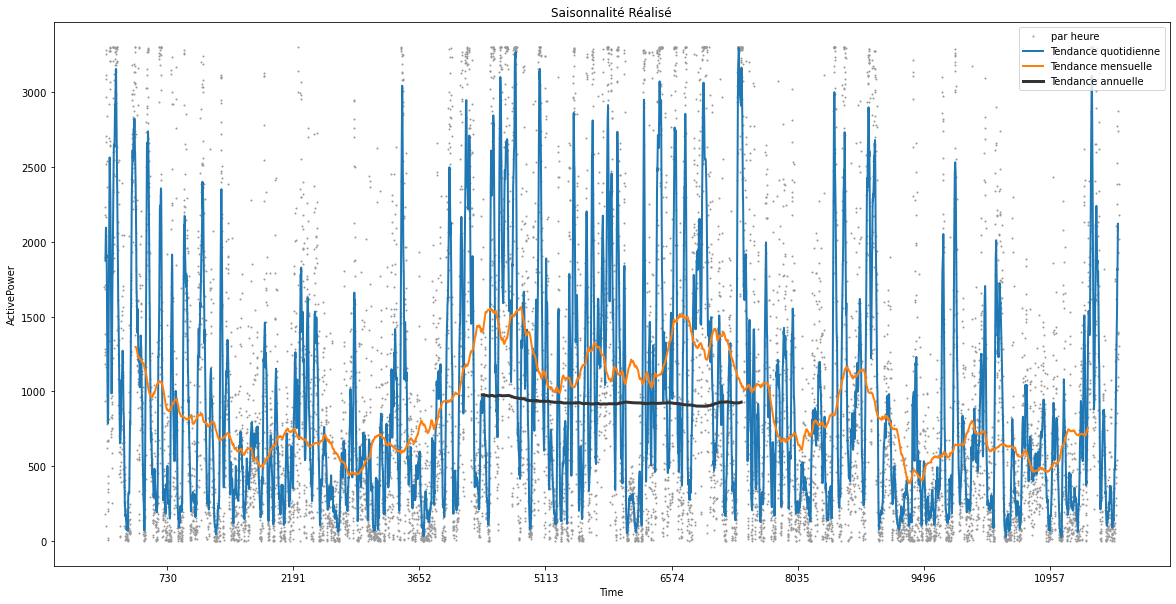

In [9]:
fig, ax = plt.subplots(figsize = (20,10))
# plotting data par heure
ax.plot(Turb2['ActivePower'], marker='.', markersize=2, color='0.6',linestyle='None', label='par heure')
# plotting data jour glissant
ax.plot(Turb2_24h_rol, linewidth=2, label='Tendance quotidienne')
# plotting data mois glissant
ax.plot(Turb2_month_rol, linewidth=2, label='Tendance mensuelle')
# plotting data année glissante
ax.plot(Turb2_year_rol, color='0.2', linewidth=3, label='Tendance annuelle')
# Beautification of plot
ax.xaxis.set_major_locator(matplotlib.dates.AutoDateLocator())
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('ActivePower')
ax.set_title('Saisonnalité Réalisé')

In [10]:
# Saisonnalité ProductionForecast_D
Turb2_24h_rol_D = Turb2['ProductionForecast_D'].rolling(window = 24, center = True).mean()
Turb2_month_rol_D = Turb2['ProductionForecast_D'].rolling(window = 720, center = True).mean()
Turb2_year_rol_D = Turb2['ProductionForecast_D'].rolling(window = 8760, center = True).mean()

Text(0.5, 1.0, 'ProductionForecast_D')

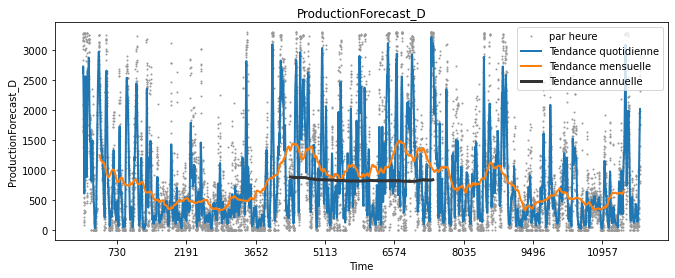

In [11]:
fig, ax = plt.subplots(figsize = (11,4))
# plotting data par heure
ax.plot(Turb2['ProductionForecast_D'], marker='.', markersize=2, color='0.6',linestyle='None', label='par heure')
# plotting data jour glissant
ax.plot(Turb2_24h_rol_D, linewidth=2, label='Tendance quotidienne')
# plotting data mois glissant
ax.plot(Turb2_month_rol_D, linewidth=2, label='Tendance mensuelle')
# plotting data année glissante
ax.plot(Turb2_year_rol_D, color='0.2', linewidth=3, label='Tendance annuelle')
# Beautification of plot
ax.xaxis.set_major_locator(matplotlib.dates.AutoDateLocator())
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('ProductionForecast_D')
ax.set_title('ProductionForecast_D')

In [12]:
# Saisonnalité ProductionForecast_M
Turb2_24h_rol_M = Turb2['ProductionForecast_M'].rolling(window = 24, center = True).mean()
Turb2_month_rol_M = Turb2['ProductionForecast_M'].rolling(window = 720, center = True).mean()
Turb2_year_rol_M = Turb2['ProductionForecast_M'].rolling(window = 8760, center = True).mean()

Text(0.5, 1.0, 'ProductionForecast_M')

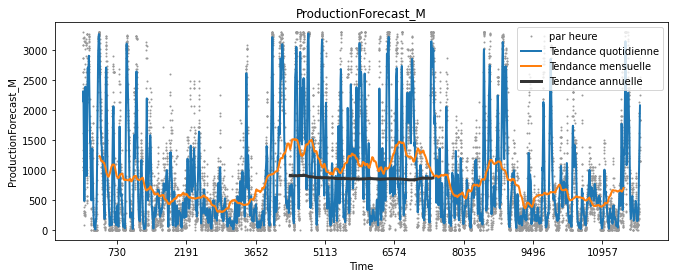

In [13]:
fig, ax = plt.subplots(figsize = (11,4))
# plotting data par heure
ax.plot(Turb2['ProductionForecast_M'], marker='.', markersize=2, color='0.6',linestyle='None', label='par heure')
# plotting data jour glissant
ax.plot(Turb2_24h_rol_M, linewidth=2, label='Tendance quotidienne')
# plotting data mois glissant
ax.plot(Turb2_month_rol_M, linewidth=2, label='Tendance mensuelle')
# plotting data année glissante
ax.plot(Turb2_year_rol_M, color='0.2', linewidth=3, label='Tendance annuelle')
# Beautification of plot
ax.xaxis.set_major_locator(matplotlib.dates.AutoDateLocator())
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('ProductionForecast_M')
ax.set_title('ProductionForecast_M')

Text(0.5, 1.0, 'Saisonnalité Réalisé')

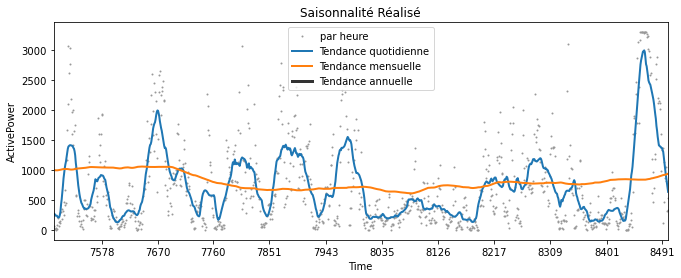

In [14]:
#Zoom saisonalité quotidienne
fig, ax = plt.subplots(figsize = (11,4))
# plotting data par heure
ax.plot(Turb2['ActivePower'], marker='.', markersize=2, color='0.6',linestyle='None', label='par heure')
# plotting data jour glissant
ax.plot(Turb2_24h_rol, linewidth=2, label='Tendance quotidienne')
# plotting data mois glissant
ax.plot(Turb2_month_rol, linewidth=2, label='Tendance mensuelle')
# plotting data année glissante
ax.plot(Turb2_year_rol, color='0.2', linewidth=3, label='Tendance annuelle')
# Beautification of plot
ax.xaxis.set_major_locator(matplotlib.dates.AutoDateLocator())
ax.legend()
ax.set_xlabel('Time')
ax.set_xlim(7500,8500)
ax.set_ylabel('ActivePower')
ax.set_title('Saisonnalité Réalisé')

Text(0.5, 1.0, 'ProductionForecast_D')

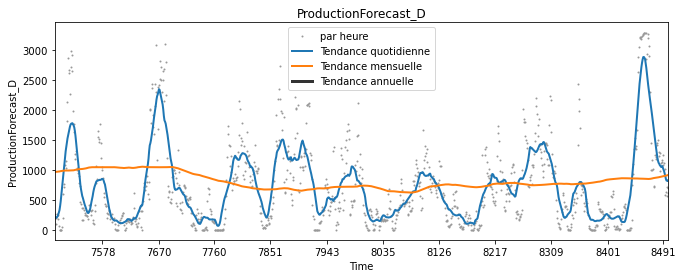

In [15]:
fig, ax = plt.subplots(figsize = (11,4))
# plotting data par heure
ax.plot(Turb2['ProductionForecast_D'], marker='.', markersize=2, color='0.6',linestyle='None', label='par heure')
# plotting data jour glissant
ax.plot(Turb2_24h_rol_D, linewidth=2, label='Tendance quotidienne')
# plotting data mois glissant
ax.plot(Turb2_month_rol_D, linewidth=2, label='Tendance mensuelle')
# plotting data année glissante
ax.plot(Turb2_year_rol_D, color='0.2', linewidth=3, label='Tendance annuelle')
# Beautification of plot
ax.xaxis.set_major_locator(matplotlib.dates.AutoDateLocator())
ax.legend()
ax.set_xlabel('Time')
ax.set_xlim(7500,8500)
ax.set_ylabel('ProductionForecast_D')
ax.set_title('ProductionForecast_D')

Text(0.5, 1.0, 'ProductionForecast_M')

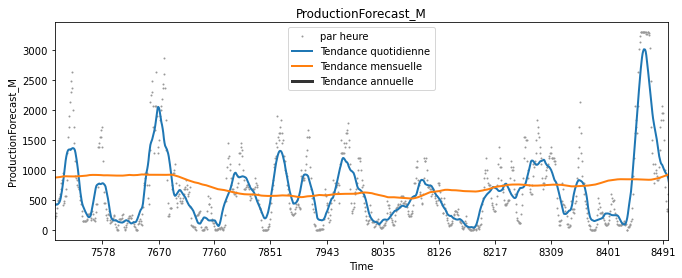

In [16]:
fig, ax = plt.subplots(figsize = (11,4))
# plotting data par heure
ax.plot(Turb2['ProductionForecast_M'], marker='.', markersize=2, color='0.6',linestyle='None', label='par heure')
# plotting data jour glissant
ax.plot(Turb2_24h_rol_M, linewidth=2, label='Tendance quotidienne')
# plotting data mois glissant
ax.plot(Turb2_month_rol_M, linewidth=2, label='Tendance mensuelle')
# plotting data année glissante
ax.plot(Turb2_year_rol_M, color='0.2', linewidth=3, label='Tendance annuelle')
# Beautification of plot
ax.xaxis.set_major_locator(matplotlib.dates.AutoDateLocator())
ax.legend()
ax.set_xlabel('Time')
ax.set_xlim(7500,8500)
ax.set_ylabel('ProductionForecast_M')
ax.set_title('ProductionForecast_M')

In [17]:
# Différenciation 1er ordre Réalisé 
Turb2_diff = Turb2['ActivePower'].diff()



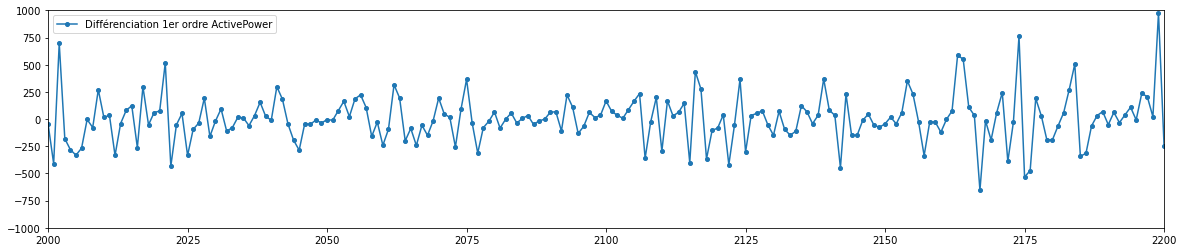

In [18]:
fig, ax = plt.subplots(figsize=(20, 4))

ax.plot(Turb2_diff,
marker='o', markersize=4, linestyle='-', label='Différenciation 1er ordre ActivePower')
#ax.set_ylabel('Réalisé')
ax.set_xlim(2000,2200)
ax.set_ylim(-1000,1000)
ax.legend();

In [19]:
# Différenciation 1er ordre ProductionForecast_D
Turb2_diff_D = Turb2['ProductionForecast_D'].diff()

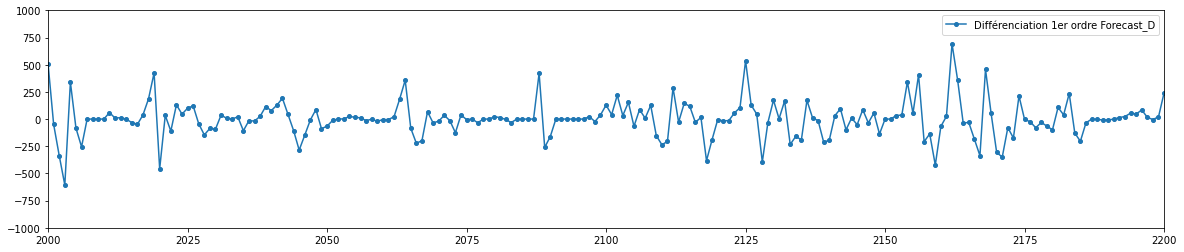

In [20]:
fig, ax = plt.subplots(figsize=(20, 4))

ax.plot(Turb2_diff_D,
marker='o', markersize=4, linestyle='-', label='Différenciation 1er ordre Forecast_D')
#ax.set_ylabel('Réalisé')
ax.set_xlim(2000,2200)
ax.set_ylim(-1000,1000)
ax.legend();

In [21]:
# Différenciation 1er ordre ProductionForecast_M
Turb2_diff_M = Turb2['ProductionForecast_M'].diff()

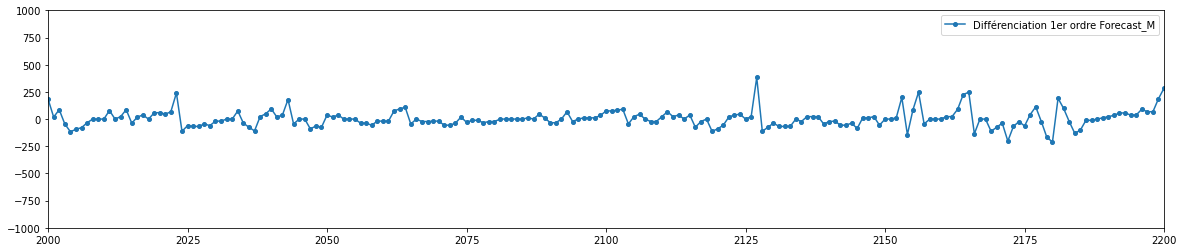

In [22]:
fig, ax = plt.subplots(figsize=(20, 4))

ax.plot(Turb2_diff_M,
marker='o', markersize=4, linestyle='-', label='Différenciation 1er ordre Forecast_M')
#ax.set_ylabel('Réalisé')
ax.set_xlim(2000,2200)
ax.set_ylim(-1000,1000)
ax.legend();

(-0.25, 0.25)

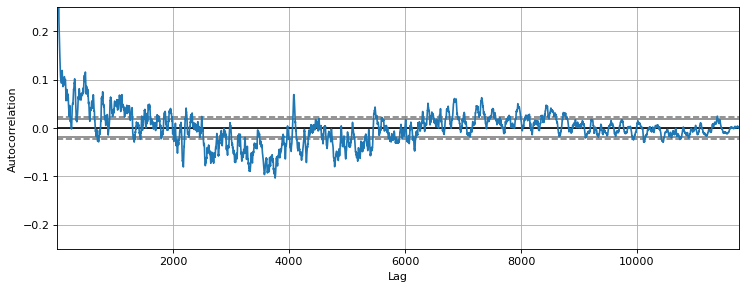

In [23]:
# Autocorrelation Réalisé
plt.figure(figsize=(11,4), dpi= 80)
pd.plotting.autocorrelation_plot(Turb2['ActivePower'])
plt.ylim(-0.25,0.25)

(-0.25, 0.25)

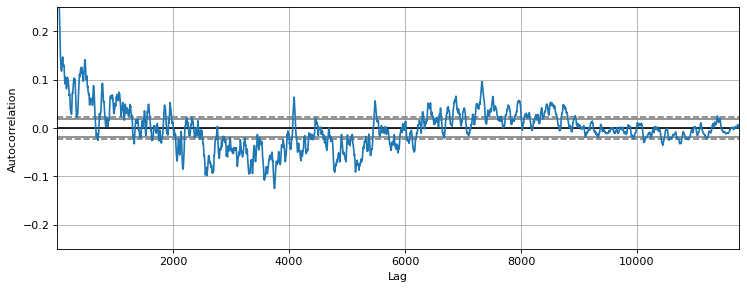

In [24]:
# Autocorrelation ProductionForecast_D
plt.figure(figsize=(11,4), dpi= 80)
pd.plotting.autocorrelation_plot(Turb2['ProductionForecast_D'])
plt.ylim(-0.25,0.25)

(-0.25, 0.25)

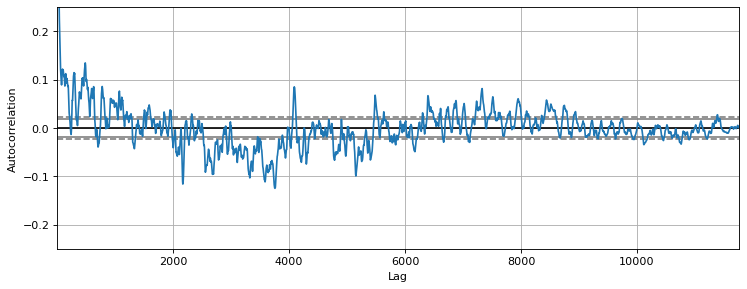

In [25]:
# Autocorrelation ProductionForecast_M
plt.figure(figsize=(11,4), dpi= 80)
pd.plotting.autocorrelation_plot(Turb2['ProductionForecast_M'])
plt.ylim(-0.25,0.25)

<AxesSubplot:>

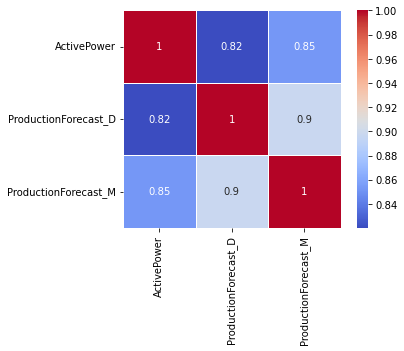

In [26]:
# Covariance
cov = Turb2.corr() 
sns.heatmap(cov, square = True, cmap="coolwarm",linewidths=.5,annot=True )

# Turb1

In [27]:
Turb1 = pd.read_csv('./FRSSO18.csv',sep=';',decimal=',',parse_dates=['DateTime'],dayfirst=True)
Turb1.head(3)

,DateTime,ActivePower,ProductionForecast_D,ProductionForecast_M
0,2020-03-05 00:00:00,1614.345422,948.189357,745.2
1,2020-03-05 01:00:00,1478.355419,967.269962,711.8
2,2020-03-05 02:00:00,1690.147069,948.830677,645.0


In [28]:
print('There are %d zero values for the variable "ActivePower".' % (Turb1.ActivePower == 0).sum())

There are 108 zero values for the variable "ActivePower".


In [29]:
print('There are %d zero values for the variable "ProductionForecast_D" .' % (Turb1.ProductionForecast_D == 0).sum())


There are 1152 zero values for the variable "ProductionForecast_D" .


In [30]:
print('There are %d zero values for the variable "ProductionForecast_M".' % (Turb1.ActivePower == 0).sum())

There are 108 zero values for the variable "ProductionForecast_M".


In [31]:

l=np.array(Turb1.loc[Turb1.ProductionForecast_D <= 0].index)[1:] - np.array(Turb1.loc[Turb1.ProductionForecast_D <= 0].index)[0:-1]
for i in l:
    print (i, end = ",") 
    if i%30==0 :
        print('\n')

1,1,1,1,5,39,1,1,1,12,1,1,1,1,1,1,2,1,199,1,1,1,114,1,1,24,1,1,1,1,7,1,1,60,

28,5,1,1,1,1,1,13,1,2,1,1,1,13,1,10,4,1,82,1,1,1,1,1,1,1,3,1,3,4,1,1,1,1,1,11,1,1,2,2,1,1,1,103,1,1,2,1,4,1,33,1,1,1,1,1,1,1,5,1,1,1,1,1,1,1,1,1,1,1,1,1,119,1,1,1,1,1,1,7,1,1,1,1,1,74,5,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,1,1,1,1,1,1,1,116,1,35,5,1,14,1,110,1,1,1,45,1,95,1,1,1,3,1,1,1,1,1,3,38,42,1,1,1,8,1,1,2,17,13,1,1,1,1,2,1,29,39,1,1,1,2,1,10,1,6,1,1,1,54,1,2,1,1,1,2,25,1,1,1,1,1,1,1,1,1,3,51,13,1,127,1,1,1,1,1,1,60,

1,41,1,1,1,15,1,54,51,1,1,1,1,1,1,1,1,9,1,1,21,10,3,25,1,2,10,1,1,1,1,1,1,1,1,1,1,1,7,1,1,1,1,1,1,1,1,1,1,1,59,1,18,1,1,1,1,1,1,4,1,7,1,1,14,4,38,1,1,1,44,1,1,1,1,1,7,19,10,1,1,5,2,1,1,6,1,1,21,10,3,20,1,1,1,1,1,1,1,8,1,1,1,1,1,1,1,1,1,1,6,1,1,1,8,4,1,1,1,1,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,3,1,2,9,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,1,1,1,1,1,2,5,1,1,1,1,1,1,36,5,1,1,1,1,1,1,1,5,79,98,1,46,3,1,1,2,67,39,1,1,26,1,3,39,31,1,1,1,3,1,12,1,1,10,6,1,2,1,1,22,1,

In [32]:
# Répartition des valeurs nulles pour ProductionForecast_D

np.array(Turb1.loc[Turb1.ProductionForecast_D <= 0].index)[1:]- np.array(Turb1.loc[Turb1.ProductionForecast_D <= 0].index)[:-1]
Turb1.loc[Turb1.ProductionForecast_D <= 0]

 

,DateTime,ActivePower,ProductionForecast_D,ProductionForecast_M
213,2020-03-13 23:00:00,96.147455,0.0,14.0
214,2020-03-14 00:00:00,81.324412,0.0,18.0
215,2020-03-14 01:00:00,59.478387,0.0,6.0
216,2020-03-14 02:00:00,29.014524,0.0,0.0
217,2020-03-14 03:00:00,198.330080,0.0,4.0
...,...,...,...,...
11669,2021-10-13 08:00:00,65.675025,0.0,71.8
11673,2021-10-16 14:00:00,0.423586,0.0,0.0
11674,2021-10-16 16:00:00,33.743984,0.0,0.0
11676,2021-10-16 22:00:00,3.609505,0.0,4.0


In [33]:
# Saisonalité ActivePower
Turb1_24h_rol = Turb1['ActivePower'].rolling(window = 24, center = True).mean()
Turb1_month_rol = Turb1['ActivePower'].rolling(window = 720, center = True).mean()
Turb1_year_rol = Turb1['ActivePower'].rolling(window = 8760, center = True).mean()

Text(0.5, 1.0, 'Saisonnalité Réalisé')

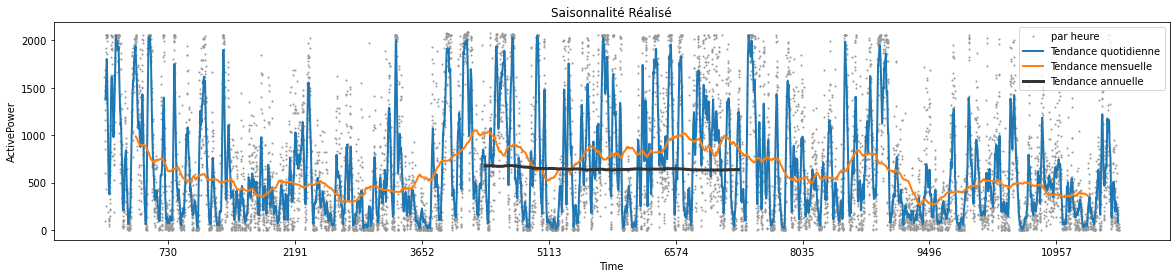

In [49]:
fig, ax = plt.subplots(figsize = (20,4))
# plotting data par heure
ax.plot(Turb1['ActivePower'], marker='.', markersize=2, color='0.6',linestyle='None', label='par heure')
# plotting data jour glissant
ax.plot(Turb1_24h_rol, linewidth=2, label='Tendance quotidienne')
# plotting data mois glissant
ax.plot(Turb1_month_rol, linewidth=2, label='Tendance mensuelle')
# plotting data année glissante
ax.plot(Turb1_year_rol, color='0.2', linewidth=3, label='Tendance annuelle')
# Beautification of plot
ax.xaxis.set_major_locator(matplotlib.dates.AutoDateLocator())
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('ActivePower')
ax.set_title('Saisonnalité Réalisé')

In [35]:
# Saisonnalité ProductionForecast_D
Turb1_24h_rol_D = Turb1['ProductionForecast_D'].rolling(window = 24, center = True).mean()
Turb1_month_rol_D = Turb1['ProductionForecast_D'].rolling(window = 720, center = True).mean()
Turb1_year_rol_D = Turb1['ProductionForecast_D'].rolling(window = 8760, center = True).mean()

Text(0.5, 1.0, 'ProductionForecast_D')

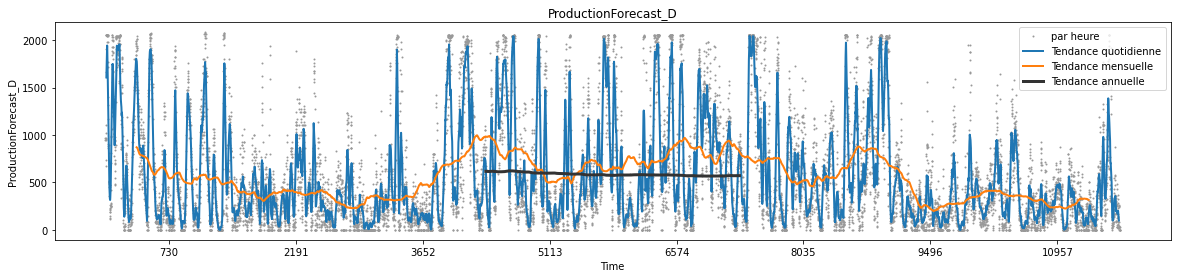

In [50]:
fig, ax = plt.subplots(figsize = (20,4))
# plotting data par heure
ax.plot(Turb1['ProductionForecast_D'], marker='.', markersize=2, color='0.6',linestyle='None', label='par heure')
# plotting data jour glissant
ax.plot(Turb1_24h_rol_D, linewidth=2, label='Tendance quotidienne')
# plotting data mois glissant
ax.plot(Turb1_month_rol_D, linewidth=2, label='Tendance mensuelle')
# plotting data année glissante
ax.plot(Turb1_year_rol_D, color='0.2', linewidth=3, label='Tendance annuelle')
# Beautification of plot
ax.xaxis.set_major_locator(matplotlib.dates.AutoDateLocator())
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('ProductionForecast_D')
ax.set_title('ProductionForecast_D')

In [37]:
# Saisonnalité ProductionForecast_M
Turb1_24h_rol_M = Turb1['ProductionForecast_M'].rolling(window = 24, center = True).mean()
Turb1_month_rol_M = Turb1['ProductionForecast_M'].rolling(window = 720, center = True).mean()
Turb1_year_rol_M = Turb1['ProductionForecast_M'].rolling(window = 8760, center = True).mean()

Text(0.5, 1.0, 'ProductionForecast_M')

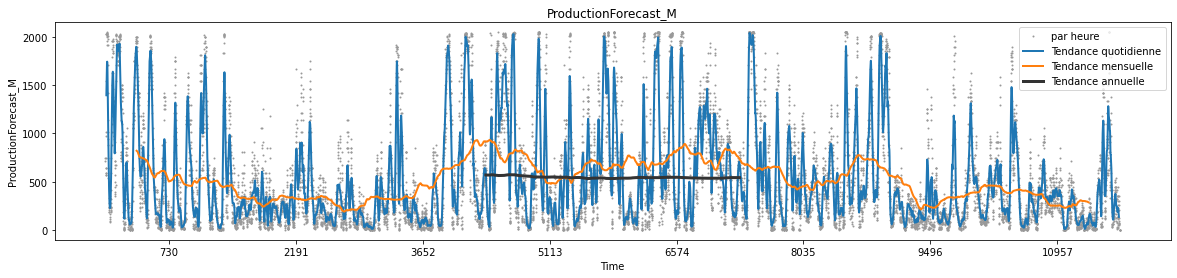

In [51]:
fig, ax = plt.subplots(figsize = (20,4))
# plotting data par heure
ax.plot(Turb1['ProductionForecast_M'], marker='.', markersize=2, color='0.6',linestyle='None', label='par heure')
# plotting data jour glissant
ax.plot(Turb1_24h_rol_M, linewidth=2, label='Tendance quotidienne')
# plotting data mois glissant
ax.plot(Turb1_month_rol_M, linewidth=2, label='Tendance mensuelle')
# plotting data année glissante
ax.plot(Turb1_year_rol_M, color='0.2', linewidth=3, label='Tendance annuelle')
# Beautification of plot
ax.xaxis.set_major_locator(matplotlib.dates.AutoDateLocator())
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('ProductionForecast_M')
ax.set_title('ProductionForecast_M')

Text(0.5, 1.0, 'Saisonnalité Réalisé')

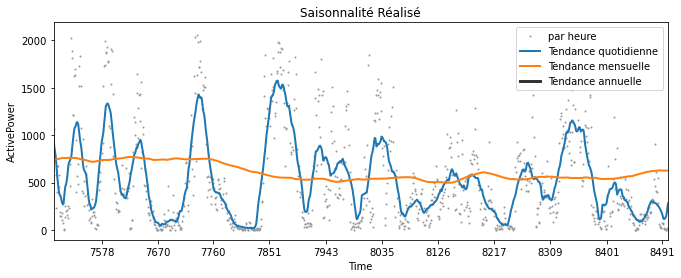

In [39]:
#Zoom saisonalité quotidienne
fig, ax = plt.subplots(figsize = (11,4))
# plotting data par heure
ax.plot(Turb1['ActivePower'], marker='.', markersize=2, color='0.6',linestyle='None', label='par heure')
# plotting data jour glissant
ax.plot(Turb1_24h_rol, linewidth=2, label='Tendance quotidienne')
# plotting data mois glissant
ax.plot(Turb1_month_rol, linewidth=2, label='Tendance mensuelle')
# plotting data année glissante
ax.plot(Turb1_year_rol, color='0.2', linewidth=3, label='Tendance annuelle')
# Beautification of plot
ax.xaxis.set_major_locator(matplotlib.dates.AutoDateLocator())
ax.legend()
ax.set_xlabel('Time')
ax.set_xlim(7500,8500)
ax.set_ylabel('ActivePower')
ax.set_title('Saisonnalité Réalisé')

Text(0.5, 1.0, 'ProductionForecast_D')

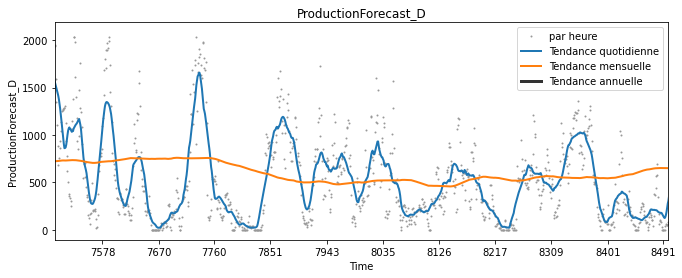

In [40]:
fig, ax = plt.subplots(figsize = (11,4))
# plotting data par heure
ax.plot(Turb1['ProductionForecast_D'], marker='.', markersize=2, color='0.6',linestyle='None', label='par heure')
# plotting data jour glissant
ax.plot(Turb1_24h_rol_D, linewidth=2, label='Tendance quotidienne')
# plotting data mois glissant
ax.plot(Turb1_month_rol_D, linewidth=2, label='Tendance mensuelle')
# plotting data année glissante
ax.plot(Turb1_year_rol_D, color='0.2', linewidth=3, label='Tendance annuelle')
# Beautification of plot
ax.xaxis.set_major_locator(matplotlib.dates.AutoDateLocator())
ax.legend()
ax.set_xlabel('Time')
ax.set_xlim(7500,8500)
ax.set_ylabel('ProductionForecast_D')
ax.set_title('ProductionForecast_D')

Text(0.5, 1.0, 'ProductionForecast_M')

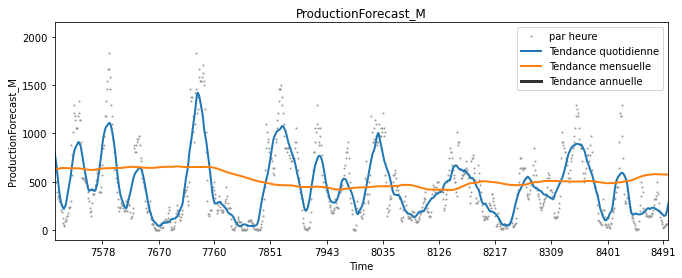

In [41]:
fig, ax = plt.subplots(figsize = (11,4))
# plotting data par heure
ax.plot(Turb1['ProductionForecast_M'], marker='.', markersize=2, color='0.6',linestyle='None', label='par heure')
# plotting data jour glissant
ax.plot(Turb1_24h_rol_M, linewidth=2, label='Tendance quotidienne')
# plotting data mois glissant
ax.plot(Turb1_month_rol_M, linewidth=2, label='Tendance mensuelle')
# plotting data année glissante
ax.plot(Turb1_year_rol_M, color='0.2', linewidth=3, label='Tendance annuelle')
# Beautification of plot
ax.xaxis.set_major_locator(matplotlib.dates.AutoDateLocator())
ax.legend()
ax.set_xlabel('Time')
ax.set_xlim(7500,8500)
ax.set_ylabel('ProductionForecast_M')
ax.set_title('ProductionForecast_M')

In [52]:
# Différenciation 1er ordre Réalisé 
Turb1_diff = Turb1['ActivePower'].diff()


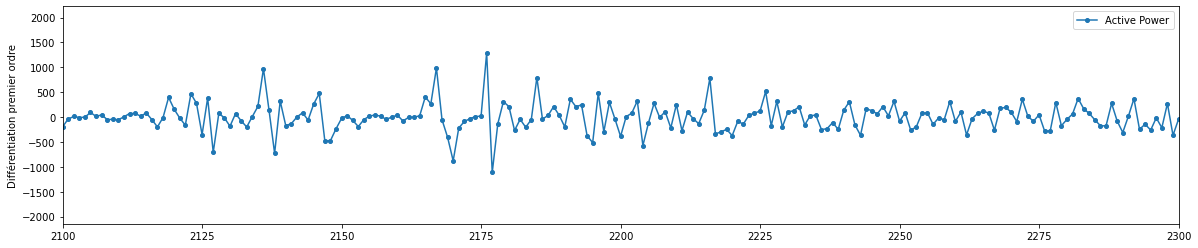

In [53]:
fig, ax = plt.subplots(figsize=(20, 4))

ax.plot(Turb1_diff,
marker='o', markersize=4, linestyle='-', label='Active Power')
ax.set_ylabel('Différentiation premier ordre')
ax.set_xlim(2100,2300)
ax.legend();

In [54]:
# Différenciation 1er ordre ProductionForecast_D
Turb1_diff_D = Turb1['ProductionForecast_D'].diff()

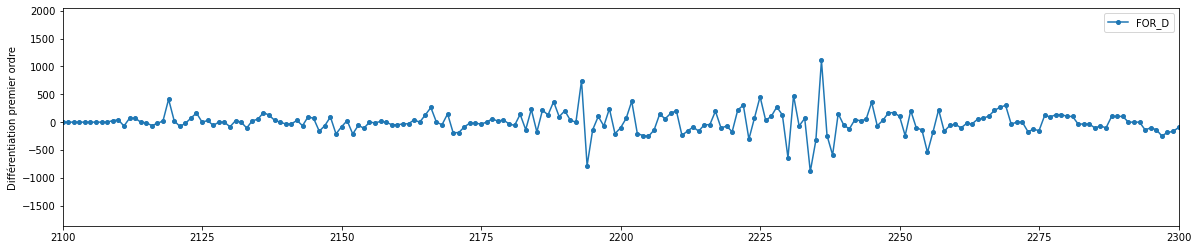

In [58]:
fig, ax = plt.subplots(figsize=(20, 4))

ax.plot(Turb1_diff_D,
marker='o', markersize=4, linestyle='-', label='FOR_D')
ax.set_ylabel('Différentiation premier ordre')
ax.set_xlim(2100,2300)
ax.legend();

In [56]:
# Différenciation 1er ordre ProductionForecast_M
Turb1_diff_M = Turb1['ProductionForecast_M'].diff()

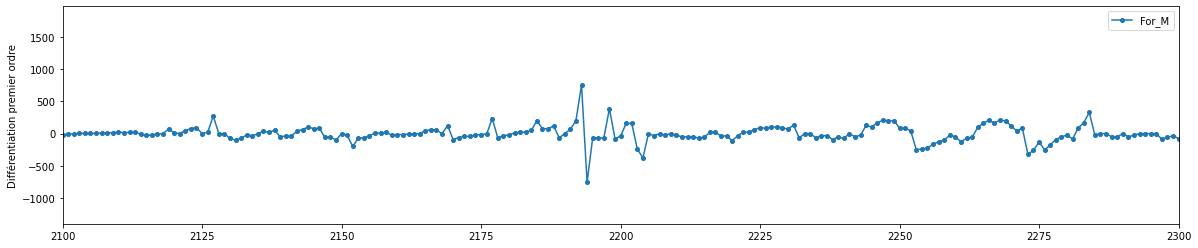

In [57]:
fig, ax = plt.subplots(figsize=(20, 4))

ax.plot(Turb1_diff_M,
marker='o', markersize=4, linestyle='-', label='For_M')
ax.set_ylabel('Différentiation premier ordre')
ax.set_xlim(2100,2300)
ax.legend();

<AxesSubplot:>

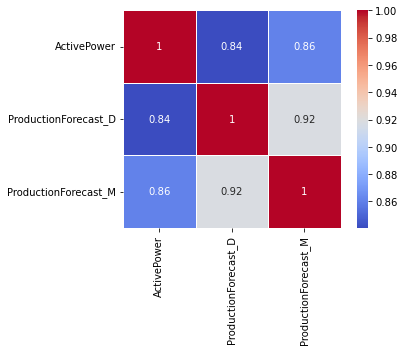

In [48]:
# Covariance
cov = Turb1.corr() 
sns.heatmap(cov, square = True, cmap="coolwarm",linewidths=.5,annot=True )